# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import imutils
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
DATASET_PATH = os.path.join("ASLdata") 
for file in os.listdir("ASLdata"):
    print(file)
    if file.endswith(".mp4"):
        path=os.path.join('ASLdata', file)
        print(path)        
        cap = cv2.VideoCapture(path)
        print(cap.isOpened())
# Set mediapipe model 
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while cap.isOpened():
                ret, frame= cap.read()
                #frame = frame1[5:400, 6:400]
                if ret==True:
                    #print(frame)
                    #frame= imutils.resize(frame, width=520, height=420)
                # Make detections
                    frame= imutils.resize(frame, width=920, height=920)
                    image, results = mediapipe_detection(frame, holistic)
                    #print(results)
                    cv2.waitKey(5)
                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # Showq to screen
                    cv2.imshow('OpenCV Feed', image)
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break 
                else:
                    break

    else:
        break
        
    cap.release()
    cv2.destroyAllWindows()

000 - Copy.mp4
ASLdata\000 - Copy.mp4
True
000.mp4
ASLdata\000.mp4
True
013_004_005.mp4
ASLdata\013_004_005.mp4
True


KeyboardInterrupt: 

In [7]:
cap.release()
cv2.destroyAllWindows()

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

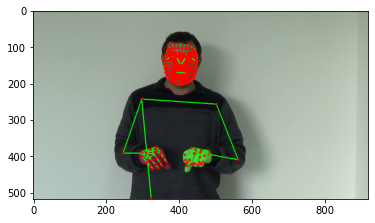

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
#len(results.left_hand_landmarks.landmark)

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    print(res)
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

x: 0.44191989302635193
y: 0.29112622141838074
z: -0.6238438487052917
visibility: 0.9999191761016846

x: 0.4559953510761261
y: 0.2507003843784332
z: -0.5843108296394348
visibility: 0.9998465776443481

x: 0.46388864517211914
y: 0.2519422173500061
z: -0.5846277475357056
visibility: 0.9998332262039185

x: 0.4719058871269226
y: 0.253052681684494
z: -0.5848536491394043
visibility: 0.9998035430908203

x: 0.4282183349132538
y: 0.2480592131614685
z: -0.5837916731834412
visibility: 0.999849796295166

x: 0.4187179505825043
y: 0.2476312220096588
z: -0.5838882327079773
visibility: 0.9998639225959778

x: 0.40908923745155334
y: 0.24707256257534027
z: -0.5839901566505432
visibility: 0.9998660087585449

x: 0.48603421449661255
y: 0.27257901430130005
z: -0.3146567940711975
visibility: 0.9998618364334106

x: 0.39720308780670166
y: 0.2664191722869873
z: -0.31441962718963623
visibility: 0.999915361404419

x: 0.459037721157074
y: 0.33432579040527344
z: -0.523472249507904
visibility: 0.9999727606773376

x: 0.

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
print(pose)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

[ 4.41919893e-01  2.91126221e-01 -6.23843849e-01  9.99919176e-01
  4.55995351e-01  2.50700384e-01 -5.84310830e-01  9.99846578e-01
  4.63888645e-01  2.51942217e-01 -5.84627748e-01  9.99833226e-01
  4.71905887e-01  2.53052682e-01 -5.84853649e-01  9.99803543e-01
  4.28218335e-01  2.48059213e-01 -5.83791673e-01  9.99849796e-01
  4.18717951e-01  2.47631222e-01 -5.83888233e-01  9.99863923e-01
  4.09089237e-01  2.47072563e-01 -5.83990157e-01  9.99866009e-01
  4.86034214e-01  2.72579014e-01 -3.14656794e-01  9.99861836e-01
  3.97203088e-01  2.66419172e-01 -3.14419627e-01  9.99915361e-01
  4.59037721e-01  3.34325790e-01 -5.23472250e-01  9.99972761e-01
  4.24184710e-01  3.30511898e-01 -5.22146404e-01  9.99976933e-01
  5.47062993e-01  4.97708887e-01 -1.50251403e-01  9.99868333e-01
  3.24425966e-01  4.71854627e-01 -1.50156438e-01  9.99939322e-01
  6.12020612e-01  7.92596579e-01 -3.20931971e-01  9.94068086e-01
  2.69169509e-01  7.58147001e-01 -2.91316509e-01  9.92179632e-01
  5.23027420e-01  7.63043

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 4.41919893e-01,  2.91126221e-01, -6.23843849e-01,  9.99919176e-01,
        4.55995351e-01,  2.50700384e-01, -5.84310830e-01,  9.99846578e-01,
        4.63888645e-01,  2.51942217e-01, -5.84627748e-01,  9.99833226e-01,
        4.71905887e-01,  2.53052682e-01, -5.84853649e-01,  9.99803543e-01,
        4.28218335e-01,  2.48059213e-01, -5.83791673e-01,  9.99849796e-01,
        4.18717951e-01,  2.47631222e-01, -5.83888233e-01,  9.99863923e-01,
        4.09089237e-01,  2.47072563e-01, -5.83990157e-01,  9.99866009e-01,
        4.86034214e-01,  2.72579014e-01, -3.14656794e-01,  9.99861836e-01,
        3.97203088e-01,  2.66419172e-01, -3.14419627e-01,  9.99915361e-01,
        4.59037721e-01,  3.34325790e-01, -5.23472250e-01,  9.99972761e-01,
        4.24184710e-01,  3.30511898e-01, -5.22146404e-01,  9.99976933e-01,
        5.47062993e-01,  4.97708887e-01, -1.50251403e-01,  9.99868333e-01,
        3.24425966e-01,  4.71854627e-01, -1.50156438e-01,  9.99939322e-01,
        6.12020612e-01,  

In [19]:
33*4+21*3+21*3

258

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 4.41919893e-01,  2.91126221e-01, -6.23843849e-01,  9.99919176e-01,
        4.55995351e-01,  2.50700384e-01, -5.84310830e-01,  9.99846578e-01,
        4.63888645e-01,  2.51942217e-01, -5.84627748e-01,  9.99833226e-01,
        4.71905887e-01,  2.53052682e-01, -5.84853649e-01,  9.99803543e-01,
        4.28218335e-01,  2.48059213e-01, -5.83791673e-01,  9.99849796e-01,
        4.18717951e-01,  2.47631222e-01, -5.83888233e-01,  9.99863923e-01,
        4.09089237e-01,  2.47072563e-01, -5.83990157e-01,  9.99866009e-01,
        4.86034214e-01,  2.72579014e-01, -3.14656794e-01,  9.99861836e-01,
        3.97203088e-01,  2.66419172e-01, -3.14419627e-01,  9.99915361e-01,
        4.59037721e-01,  3.34325790e-01, -5.23472250e-01,  9.99972761e-01,
        4.24184710e-01,  3.30511898e-01, -5.22146404e-01,  9.99976933e-01,
        5.47062993e-01,  4.97708887e-01, -1.50251403e-01,  9.99868333e-01,
        3.24425966e-01,  4.71854627e-01, -1.50156438e-01,  9.99939322e-01,
        6.12020612e-01,  

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_psl_f_2') 

# Actions that we try to detect
actions = np.array(['Act', 'Angry', 'Before', 'Birthday', 'Car', 'Child', 'Congratulation', 'Drink', 'Education', 'Food', 'Friend', 'Good', 'Happy', 'Hello', 'Job', 'Market', 'Mother', 'Pakistan', 'Restaurant', 'Tahnk you'])
# Thirty videos worth of data
no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 3

In [32]:
# train
# Path for exported data, numpy arrays
DATA_PATH2 = os.path.join('MP_Data_psl_demotest') 

# Actions that we try to detect
actions = np.array(['Act', 'Angry', 'Before', 'Birthday', 'Car', 'Child', 'Congratulation', 'Drink', 'Education', 'Food', 'Friend', 'Good', 'Happy', 'Hello', 'Job', 'Market', 'Mother', 'Pakistan', 'Restaurant', 'Tahnk you'])
# Thirty videos worth of data
no_sequences = 1

# Videos are going to be 30 frames in length
sequence_length = 3

In [164]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [368]:
#train

for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH2, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [369]:
DATASET_PATH = os.path.join("TestingDataset") 
for file, action in zip(os.listdir("TestingDataset"),actions):
    print(os.path.join("TestingDataset", file))
    for file2, sequence2 in zip(os.listdir(os.path.join(DATASET_PATH, file)),range(no_sequences)):
        print(file2)
        print(sequence)
        if file2.endswith(".mp4"):
            pathroot=os.path.join(DATASET_PATH, file)
            path=os.path.join(pathroot, file2)
            #print(path)        
            cap = cv2.VideoCapture(path)
        # Set mediapipe model 
            with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic: 

                for sequence in range(sequence_length):
                    # Loop through video length aka sequence length
                    for frame_num in range(20):

                        # Read feed
                        ret, frame = cap.read()
                        if ret==True:
                        # Make detections
                            frame= imutils.resize(frame, width=920, height=920)
                            image, results = mediapipe_detection(frame, holistic)
            #                 print(results)

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # NEW Apply wait logic
                            if frame_num == 0: 
                                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                                cv2.putText(image, 'Collecting frames for {} Frame Number {}'.format(action, sequence), (15,12), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)
                                #cv2.waitKey(1000)
                            else: 
                                cv2.putText(image, 'Collecting frames for {} Frame Number {}'.format(action, sequence), (15,12), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)

                            # NEW Export keypoints
                            #print(results.multi_hand_landmarks)
                            keypoints = extract_keypoints(results)
                            #print(np.array(keypoints).size)
                            npy_path = os.path.join(DATA_PATH2, action, str(sequence2), str(sequence))
                            np.save(npy_path, keypoints)

                            # Break gracefully
                            if cv2.waitKey(15) & 0xFF == ord('q'):
                                break

            cap.release()
            cv2.destroyAllWindows()
                

TestingDataset\Act
act41.mp4
0
TestingDataset\Angry
WhatsApp Video 2022-03-17 at 5.36.44 AM.mp4
2
TestingDataset\Before
WhatsApp Video 2022-03-17 at 5.36.35 AM.mp4
2
TestingDataset\Birthday
WhatsApp Video 2022-03-17 at 5.36.31 AM.mp4
2
TestingDataset\Car
WhatsApp Video 2022-03-17 at 4.40.36 AM.mp4
2
TestingDataset\Child
WhatsApp Video 2022-03-17 at 5.36.23 AM.mp4
2
TestingDataset\Congratulation
WhatsApp Video 2022-03-17 at 5.36.22 AM.mp4
2
TestingDataset\Drink
WhatsApp Video 2022-03-17 at 4.40.44 AM.mp4
2
TestingDataset\Education
WhatsApp Video 2022-03-17 at 4.40.55 AM.mp4
2
TestingDataset\Food
WhatsApp Video 2022-03-17 at 4.41.02 AM.mp4
2
TestingDataset\Friend
WhatsApp Video 2022-03-17 at 4.41.00 AM.mp4
2
TestingDataset\Good
WhatsApp Video 2022-03-16 at 11.06.36 AM (4).mp4
2
TestingDataset\Happy
happy28.mp4
2
TestingDataset\Hello
WhatsApp Video 2022-03-16 at 11.06.36 AM (1).mp4
2
TestingDataset\Job
WhatsApp Video 2022-03-16 at 11.06.36 AM (2).mp4
2
TestingDataset\Market
WhatsApp Video

In [370]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'Act': 0,
 'Angry': 1,
 'Before': 2,
 'Birthday': 3,
 'Car': 4,
 'Child': 5,
 'Congratulation': 6,
 'Drink': 7,
 'Education': 8,
 'Food': 9,
 'Friend': 10,
 'Good': 11,
 'Happy': 12,
 'Hello': 13,
 'Job': 14,
 'Market': 15,
 'Mother': 16,
 'Pakistan': 17,
 'Restaurant': 18,
 'Tahnk you': 19}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(40):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            #print(np.array(res).size)
            window.append(res)
            #print(window)
        sequences.append(window)
        #print(sequences)
        labels.append(label_map[action])

In [33]:
#train
sequences2, labels2 = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH2, action, str(sequence), "{}.npy".format(frame_num)))
            #print(np.array(res).size)
            window.append(res)
            #print(window)
        sequences2.append(window)
        #print(sequences)
        labels2.append(label_map[action])

In [34]:
np.array(sequences).shape

(800, 3, 258)

In [35]:
np.array(sequences2).shape

(20, 3, 258)

In [36]:
np.array(labels).shape

(800,)

In [37]:
np.array(labels2).shape

(20,)

In [38]:
X = np.array(sequences)
xT=np.array(sequences2)

In [39]:
yT = to_categorical(labels2).astype(int)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
X_train=X
y_train=y
X_test=xT
y_test=yT

In [42]:
y.shape

(800, 20)

In [43]:
y_test.shape
#y_test.shape

(20, 20)

# 7. Build and Train LSTM Neural Network

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [53]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [54]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(3, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
res = [.7, 0.2, 0.1,0.5,0.8,0.6]

In [56]:
actions[np.argmax(res)]

'Car'

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=135, callbacks=[tb_callback])

Epoch 1/135
25/25 [==============================] - 2s 7ms/step - loss: 2.9643 - categorical_accuracy: 0.0737
Epoch 2/135
25/25 [==============================] - 0s 7ms/step - loss: 2.7072 - categorical_accuracy: 0.1088
Epoch 3/135
25/25 [==============================] - 0s 7ms/step - loss: 2.5094 - categorical_accuracy: 0.1075
Epoch 4/135
25/25 [==============================] - 0s 7ms/step - loss: 2.3996 - categorical_accuracy: 0.1275
Epoch 5/135
25/25 [==============================] - 0s 7ms/step - loss: 2.2929 - categorical_accuracy: 0.1937
Epoch 6/135
25/25 [==============================] - 0s 8ms/step - loss: 2.1241 - categorical_accuracy: 0.2387
Epoch 7/135
25/25 [==============================] - 0s 7ms/step - loss: 2.0582 - categorical_accuracy: 0.2512
Epoch 8/135
25/25 [==============================] - 0s 7ms/step - loss: 1.8861 - categorical_accuracy: 0.3462
Epoch 9/135
25/25 [==============================] - 0s 7ms/step - loss: 1.8319 - categorical_accuracy: 0.3200
E

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 64)             82688     
                                                                 
 lstm_4 (LSTM)               (None, 3, 128)            98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 20)                660       
                                                                 
Total params: 237,812
Trainable params: 237,812
Non-tr

In [60]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

1/1 [==============================] - 0s 489ms/step - loss: 3.2053 - categorical_accuracy: 0.6500
Test accuracy: 65.0%


# 8. Make Predictions

In [61]:
res = model.predict(X_test)

In [62]:
for i in range(20):
    print('Model output: ',actions[np.argmax(res[i])])
    print('Actual output: ',actions[np.argmax(y_test[i])])
    


Model output:  Act
Actual output:  Act
Model output:  Angry
Actual output:  Angry
Model output:  Pakistan
Actual output:  Before
Model output:  Birthday
Actual output:  Birthday
Model output:  Car
Actual output:  Car
Model output:  Friend
Actual output:  Child
Model output:  Congratulation
Actual output:  Congratulation
Model output:  Mother
Actual output:  Drink
Model output:  Food
Actual output:  Education
Model output:  Food
Actual output:  Food
Model output:  Friend
Actual output:  Friend
Model output:  Good
Actual output:  Good
Model output:  Happy
Actual output:  Happy
Model output:  Hello
Actual output:  Hello
Model output:  Job
Actual output:  Job
Model output:  Congratulation
Actual output:  Market
Model output:  Pakistan
Actual output:  Mother
Model output:  Pakistan
Actual output:  Pakistan
Model output:  Restaurant
Actual output:  Restaurant
Model output:  Education
Actual output:  Tahnk you


In [63]:
actions[np.argmax(res[16])]

'Pakistan'

In [64]:
actions[np.argmax(y_test[16])]

'Mother'

# 9. Save Weights

In [67]:
model.save('model.h5')

In [28]:
 model = load_model('model.h5')

NameError: name 'load_model' is not defined

In [322]:
 model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [10]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [11]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [329]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [326]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [109]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  1],
        [ 0,  0]],

       [[14,  1],
        [ 0,  0]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 1,  0]],

       [[14,  0],
        [ 1,  0]],

       [[14,  1],
        [ 0,  0]],

       [[11,  3],
        [ 1,  0]],

       [[13,  0],
        [ 1,  1]],

       [[14,  0],
        [ 0,  1]],

       [[12,  0],
        [ 2,  1]],

       [[12,  2],
        [ 0,  1]],

       [[12,  0],
        [ 2,  1]]], dtype=int64)

In [111]:
accuracy_score(ytrue, yhat)

0.4666666666666667

# 11. Test in Real Time

In [41]:
from keras.models import load_model

In [42]:
 model = load_model('model.h5')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 64)             82688     
                                                                 
 lstm_4 (LSTM)               (None, 3, 128)            98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 20)                660       
                                                                 
Total params: 237,812
Trainable params: 237,812
Non-tr

In [ ]:
#os.makedirs(os.path.join('Test'))

In [57]:
sequence = []
sentence = []
predictions = []
threshold = 0.8
cap = cv2.VideoCapture('act41.mp4')
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.9) as holistic: 
    sequence = []
    for seq in range(3):
        # Loop through video length aka sequence length
        for frame_num in range(20):

            # Read feed
            ret, frame = cap.read()
            if ret==True:
            # Make detections
                frame= imutils.resize(frame, width=920, height=920)
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                    cv2.putText(image, 'Collecting frames for {}'.format(seq), (25,32), 
                                                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screenq
                    cv2.imshow('OpenCV Feed', image)
                    #cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {}'.format(seq), (25,32),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                #print(results.multi_hand_landmarks)
                keypoints = extract_keypoints(results)
               
                npy_path = os.path.join('test', str(seq))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(15) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()
for frame_num in range(3):
    res = np.load(os.path.join('test', "{}.npy".format(frame_num)))
    #print(np.array(res).size)
    sequence.append(res)
    #print(window)

#print(sequences)

res = model.predict(np.expand_dims(sequence, axis=0))[0]
print(actions[np.argmax(res)])
predictions.append(np.argmax(res))



Act


In [1]:
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.8
# x=0
# cap = cv2.VideoCapture('birthday.mp4')
# print(cap)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     for seq in range(3):
#         for frame_num in range(20):

#             # Read feed

#             ret, frame = cap.read()
#             if ret == True:


#                 # Make detections
#                 #frame= imutils.resize(frame, width=920, height=920)
#                 image, results = mediapipe_detection(frame, holistic)
#         #         print(results)
                
#                 # 2. Prediction logic
#                 keypoints = extract_keypoints(results)
#                 sequence.append(keypoints)


#                 if len(sequence) == 3:
#                     res = model.predict(np.expand_dims(sequence, axis=0))[0]
#                     print(actions[np.argmax(res)])
#                     predictions.append(np.argmax(res))
#                     #break

#                 #3. Viz logic
#                     if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                         if res[np.argmax(res)] > threshold: 

#                             if len(sentence) > 0: 
#                                 if actions[np.argmax(res)] != sentence[-1]:
#                                     sentence.append(actions[np.argmax(res)])
#                             else:
#                                 sentence.append(actions[np.argmax(res)])

#                     if len(sentence) > 5: 
#                         sentence = sentence[-5:]

#                     # Viz probabilities
#                     #image = prob_viz(res, actions, image, colors)

#                 cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#                 cv2.putText(image, ' '.join(sentence), (3,30), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#                 cv2.putText(image, 'Collecting frames for {}'.format(seq), (25,32), 
#                                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

#                 # Show to screenq
#                 cv2.imshow('OpenCV Feed', image)

#                 # Break gracefully
#                 if cv2.waitKey(1) & 0xFF == ord('q'):
#                     break

#             else:
#                 break

#         cap.release()
#         cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [37]:
sequence = []
sentence = []
predictions = []
threshold = 0.8
x=0
cap = cv2.VideoCapture('birthday.mp4')
print(cap)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for seq in range(3):
        for frame_num in range(20):

            # Read feed

            ret, frame = cap.read()
            if ret == True:


                # Make detections
                #frame= imutils.resize(frame, width=920, height=920)
                image, results = mediapipe_detection(frame, holistic)
        #         print(results)
                
                # 2. Prediction logic
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                sequence = sequence[-3:]

                if len(sequence) == 3:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(actions[np.argmax(res)])
                    predictions.append(np.argmax(res))
                    #break

                #3. Viz logic
                    if np.unique(predictions[-10:])[0]==np.argmax(res): 
                        if res[np.argmax(res)] > threshold: 

                            if len(sentence) > 0: 
                                if actions[np.argmax(res)] != sentence[-1]:
                                    sentence.append(actions[np.argmax(res)])
                            else:
                                sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                    # Viz probabilities
                    #image = prob_viz(res, actions, image, colors)

                cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3,30), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {}'.format(seq), (25,32), 
                                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screenq
                cv2.imshow('OpenCV Feed', image)

                # Break gracefully
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            else:
                break

        cap.release()
        cv2.destroyAllWindows()

<VideoCapture 00000298D68104F0>
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday
Birthday


In [74]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.8

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
        
#         ret, frame = cap.read()
#         cv2.waitKey(500)
#         # Make detections
#         #frame= imutils.resize(frame, width=920, height=920)
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-5:]
        
#         if len(sequence) == 3:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 3: 
#                 sentence = sentence[-3:]

#             # Viz probabilities
#             #image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#         cv2.putText(image, 'Collecting frames for {}'.format(len(sequence)), (25,32), 
#                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        
#         # Show to screenq
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [76]:
res[np.argmax(res)] > threshold

True

In [78]:
(60,18,1662)

(60, 18, 1662)

In [79]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[7.1993120e-11, 1.4309568e-29, 9.9994814e-01, 4.1384763e-30,
        5.1894232e-05, 3.3388570e-16]], dtype=float32)